In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from cataclop.ml import preprocessing
from cataclop.ml import exploration

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

from cataclop.ml.pipeline import factories

In [2]:
program = factories.Program.factory('default', version='1.1')

In [3]:
program.train(dataset_params = {
    #'from': '2013-05-10'
    'from': '2017-01-01',
    'to': '2018-12-01',
    'categories': ['PLAT']
}, model_params = {
    'kfolds': 3,
    'nan_flag': 100000
})

loading data 2478b08edac2d9e7911675e764ea589b from cache
preparing model data
training xgb_10
mea: 2908.770383223102
training xgb_30
mea: 2908.1794500073565
training xgb_100
mea: 2907.762621166882
training ridge_0.1
mea: 2903.8526299393507
training ridge_1
mea: 2903.85077960463
training lasso_0.1
/Users/pourquoi/.local/share/virtualenvs/cataclop-django-M9amAh3O/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
mea: 2904.028467178608
training lasso_1
/Users/pourquoi/.local/share/virtualenvs/cataclop-django-M9amAh3O/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
me

In [4]:
len(program.model.models[0]['estimators'])
program.model.hash

'd0942da38b381c194c08679272e3c9b4'

In [5]:
program.dataset.save()
program.model.save()

In [6]:
print('{} races from {} to {}'.format(program.df.race_id.nunique(), program.df.start_at.min(), program.df.start_at.max()))

9343 races from 2017-01-01 12:40:00 to 2018-11-22 21:15:00


In [7]:

for model in program.model.models:
    clf = model['estimators'][-1]['pipeline'].steps[-1][1]
    if hasattr(clf, 'feature_importances_'):
        fi = pd.Series(clf.feature_importances_, index=program.model.features+preprocessing.get_dummy_features(model['estimators'][-1]['dummies']))
        print(model['name'])
        print(fi.sort_values(ascending=False)[0:100])
        print("---\n")
    if hasattr(clf, 'coef_'):
        fi = pd.Series(clf.coef_, index=program.model.features+preprocessing.get_dummy_features(model['estimators'][-1]['dummies']))
        print(model['name'])
        print(fi.sort_values(ascending=False)[0:100])
        print("---\n")


for model in program.model.stacked_models:
    clf = model['estimators'][-1]['pipeline'].steps[-1][1]
    if hasattr(clf, 'feature_importances_'):
        fi = pd.Series(clf.feature_importances_, index=program.model.stacked_features+preprocessing.get_dummy_features(model['estimators'][-1]['dummies']))
        print(model['name'])
        print(fi.sort_values(ascending=False)[0:100])
        print("---\n")
    if hasattr(clf, 'coef_'):
        fi = pd.Series(clf.coef_, index=program.model.stacked_features+preprocessing.get_dummy_features(model['estimators'][-1]['dummies']))
        print(model['name'])
        print(fi.sort_values(ascending=False)[0:100])
        print("---\n")


xgb_10
hist_1_pos                                         0.200000
odds_9                                             0.171429
declared_player_count                              0.142857
victory_earnings_r                                 0.100000
victory_earnings                                   0.085714
odds_6                                             0.071429
handicap_weight_r                                  0.057143
odds_8                                             0.042857
odds_7                                             0.042857
odds_2                                             0.028571
placed_earnings_r                                  0.028571
placed_earnings_amax                               0.014286
hist_2_pos                                         0.014286
handicap_weight_mean                               0.000000
placed_3_count                                     0.000000
placed_2_count                                     0.000000
placed_2_count_amax              

rf_30
hist_1_pos                                         0.086160
victory_earnings_r                                 0.084814
handicap_weight_r                                  0.052113
race_count_r                                       0.050661
odds_9                                             0.039766
victory_earnings                                   0.034766
odds_4                                             0.032969
declared_player_count                              0.030856
placed_earnings_r                                  0.028823
odds_6                                             0.021377
odds_5                                             0.021160
odds_3                                             0.020985
hist_2_pos                                         0.019717
race_count                                         0.019683
odds_8                                             0.019613
odds_2                                             0.019538
placed_2_count_r                  

xgb
pred_xgb_100_1                                     0.157742
pred_rf_100_1                                      0.091172
pred_xgb_30_1                                      0.070912
pred_gbr_100_1                                     0.052098
pred_ridge_0.1_1                                   0.039074
pred_gbr_10_1                                      0.037627
pred_gbr_30_1                                      0.033285
pred_xgb_10_1                                      0.030391
declared_player_count                              0.028944
pred_lasso_1_1                                     0.024602
pred_rf_30_1                                       0.023155
odds_5                                             0.020260
pred_xgb_100_std                                   0.020260
pred_lasso_0.1_1                                   0.018813
pred_rf_10_1                                       0.015919
pred_knn_10_1                                      0.015919
pred_xgb_30_std                     

In [8]:
df = program.df

for model in program.model.models:
    print(model['name'], df['pred_{}_1'.format(model['name'])].mean())

xgb_10 11.546342941691192
xgb_30 16.724678730219946
xgb_100 17.675777307555865
ridge_0.1 -10.141525861912598
ridge_1 -9.586885420196241
lasso_0.1 21.500304948514746
lasso_1 21.420869223583956
knn_5 16.047610345093208
knn_10 16.16951346094593
knn_20 16.239225995609306
knn_30 16.31692808632466
gbr_10 17.423127116390482
gbr_30 17.393437750312817
gbr_100 17.716456586239428
rf_10 19.423926015501014
rf_30 19.39184302564474
rf_100 19.351019984901292


In [10]:
#exploration.random_race(df, cols=['position', 'declared_player_count', 'sub_category', 'num', 'final_odds', 'final_odds_ref', 'pred_stacked'] + ['pred_stacked_{}'.format(pos+1) for pos in range(1,8)] + ['pred_xgb_100_1', 'pred_rf_100_1', 'pred_knn_5_1', 'pred_mlp_100_1', 'pred_ridge_1_1']).sort_values(by='pred_stacked_8', ascending=False)
exploration.random_race(df, cols=['position', 'declared_player_count', 'sub_category', 'num', 'final_odds', 'final_odds_ref'] + ['pred_{}_1'.format(model['name']) for model in program.model.models] + ['pred_stacked_{}_1'.format(model['name']) for model in program.model.stacked_models]).sort_values(by='position', ascending=True)



position  declared_player_count sub_category  num  final_odds  \
race_id                                                                        
4604    17720       1.0                     10   A_RECLAMER    1         4.0   
        17721       2.0                     10   A_RECLAMER    2         2.6   
        17722       3.0                     10   A_RECLAMER    3         4.4   
        17728       4.0                     10   A_RECLAMER    9        53.8   
        17724       5.0                     10   A_RECLAMER    5        21.9   
        17729       6.0                     10   A_RECLAMER   10        12.3   
        17726       7.0                     10   A_RECLAMER    7        41.4   
        17727       8.0                     10   A_RECLAMER    8        11.6   
        17725       9.0                     10   A_RECLAMER    6        24.7   
        17723      10.0                     10   A_RECLAMER    4        60.7   

               final_odds_ref  pred_xgb_10_1  pred_xgb_30_1  pred_xgb_100_1  \
race_id                                                                       
4604    17720             5.3       9.022065      12.532117        8.491974   
        17721             3.6       7.494620      11.477543       10.203448   
        17722             3.6       6.533695       9.016868        5.039392   
        17728            37.3      10.615160      16.514500       18.868584   
        17724            11.8      16.970871      24.598911       27.394148   
        17729             8.5       7.762345      11.110754       11.767778   
        17726            21.5      17.748182      27.447252       26.796345   
        17727            13.1      16.970871      22.995697       24.128567   
        17725            16.2      16.970871      24.040884       28.991055   
        17723            35.0      17.748182      27.447252       26.796345   

               pred_ridge_0.1_1  pred_ridge_1_1  pred_lasso_0.1_1  \
race_id                                                             
4604    17720          1.125378        1.139200          4.150399   
        17721         12.295540       12.306036         12.215262   
        17722          3.919364        3.932012          5.788113   
        17728         10.581272       10.592729         11.884268   
        17724         23.786364       23.797982         26.023290   
        17729          7.243602        7.254974          8.271624   
        17726         25.980525       25.992213         27.887699   
        17727         23.331076       23.342970         25.494460   
        17725         25.118915       25.130117         26.700282   
        17723         25.980525       25.992213         27.887699   

               pred_lasso_1_1  pred_knn_5_1  pred_knn_10_1  pred_knn_20_1  \
race_id                                                                     
4604    17720       14.540384          5.54           7.21          8.025   
        17721       16.092219         11.98           9.51         10.830   
        17722       15.281188          9.68           7.62          7.900   
        17728       17.953082          9.96          13.09         15.705   
        17724       30.655187         25.84          28.05         29.840   
        17729       15.830575         21.74          15.91         12.310   
        17726       30.655216         25.78          27.24         28.220   
        17727       30.655189         22.66          23.49         28.175   
        17725       30.655201         28.28          26.25         26.395   
        17723       30.655216         25.78          27.24         28.220   

               pred_knn_30_1  pred_gbr_10_1  pred_gbr_30_1  pred_gbr_100_1  \
race_id                                                                      
4604    17720       7.973333      14.850556      11.963305        8.299563   
        17721      11.046667      13.708226      11.073642        8.681415   
        17722       7.466667      12.36

In [11]:
#df['pred_sum'] = df[['pred_{}_1'.format(model['name']) for model in program.model.models ]].sum(axis=1)
#df['pred_sum'] = df[['pred_knn_{}_1'.format(n) for n in [5,10,20,30]]].sum(axis=1)
df['pred_sum'] = df[['pred_{}_1'.format(model['name']) for model in program.model.models ]].sum(axis=1)

In [12]:
df['pred_rnd'] = np.random.rand(df.shape[0])

for model in program.model.models:
    df['pred_minus_ref_{}'.format(model['name'])] = df['pred_{}_1'.format(model['name'])] - df['final_odds_ref']
    
for model in program.model.stacked_models:
    df['pred_minus_ref_stacked_{}'.format(model['name'])] = df['pred_stacked_{}_1'.format(model['name'])] - df['final_odds_ref']

In [13]:
#program.bet(N=1, max_odds=20, targets=['pred_rnd', 'final_odds_ref', 'pred_sum'] + ['pred_{}_1'.format(model['name']) for model in program.model.models])
#bets = program.bets
#bets['profit'].mean()

In [14]:
def bet(df, features, categorical_features, targets, N=1, max_odds=20, break_on_bet=True, break_on_odds=False):

    races = df.sort_values('start_at').groupby('race_id')

    bets = []

    for (id, race) in races:

        candidate_bets = []

        nums = []

        for target in targets:

            r = race.sort_values(by=target, ascending=False)

            if len(r) <= N:
                break
                
            NN = N

            for n in range(NN):

                player = r.iloc[n]

                odds = player['final_odds_ref']

                if max_odds is not None and odds > max_odds:
                    if break_on_odds:
                        break
                    else:
                        continue

                #nth = (r['final_odds_ref']<odds).sum()+1
                
                if player[target] < 0:
                    break

                bet = np.clip(player[target]/100.0, 0, 10)
                
                bet = np.round(1+bet) * 1.5
                
                if bet <= 0:
                    break
                
                if n+1 < len(r) and r.iloc[n+1][target] == player[target]:
                    NN = NN+1
                    
                bet = 1

                profit = player['winner_dividend']/100.0 * bet - bet

                row = [id, player['start_at'], player['num'], player['position'], n, odds, player['final_odds'], target, player[target], r[target].std(), bet, profit]

                for nn in range(1,4):
                    if n+nn < len(r):
                        row.append(r.iloc[n+nn][target])
                    else:
                        row.append(np.nan)

                for f in features:
                    row.append(player[f])
                for f in categorical_features:
                    row.append(player[f])

                candidate_bets.append( row )

                nums.append(player['num'])

                if break_on_bet:
                    break

        #if len(candidate_bets) == 1:
        #    bets += candidate_bets
        bets += candidate_bets

    cols = ['id', 'date', 'num', 'pos', 'nb', 'odds_ref', 'odds_final', 'target', 'pred', 'pred_std', 'bet', 'profit']

    for nn in range(1,4):
        cols.append('next_pred_{}'.format(nn))

    cols = cols + features + categorical_features

    bets = pd.DataFrame(bets, columns=cols)
    bets['date'] = pd.to_datetime(bets['date'])

    bets = bets.set_index(bets['date'])
    bets = bets.sort_index()

    bets['bets'] = bets['bet'].cumsum()
    bets['stash'] = bets['profit'].cumsum()

    return bets



In [15]:
bets = bet(df, program.model.features, program.model.categorical_features, 
    N=3, max_odds=30, break_on_bet=False, break_on_odds=False, 
    targets=['pred_rnd', 'final_odds_ref', 'pred_sum'] + ['pred_{}_1'.format(model['name']) for model in program.model.models] + ['pred_stacked_{}_1'.format(model['name']) for model in program.model.stacked_models] + ['pred_minus_ref_stacked_{}'.format(model['name']) for model in program.model.stacked_models] + ['pred_minus_ref_{}'.format(model['name']) for model in program.model.models]
   )
    

In [16]:
bets['nb'].describe()

count    1.059405e+06
mean     1.022157e+00
std      8.144916e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: nb, dtype: float64

In [17]:
df[['pred_{}_1'.format(model['name']) for model in program.model.models]].describe()

,pred_xgb_10_1,pred_xgb_30_1,pred_xgb_100_1,pred_ridge_0.1_1,pred_ridge_1_1,pred_lasso_0.1_1,pred_lasso_1_1,pred_knn_5_1,pred_knn_10_1,pred_knn_20_1,pred_knn_30_1,pred_gbr_10_1,pred_gbr_30_1,pred_gbr_100_1,pred_rf_10_1,pred_rf_30_1,pred_rf_100_1
count,103856.000000,103856.000000,103856.000000,103856.000000,103856.000000,103856.000000,103856.000000,103856.000000,103856.000000,103856.000000,103856.000000,103856.000000,103856.000000,103856.000000,103856.000000,103856.000000,103856.000000
mean,11.546343,16.724679,17.675777,-10.141526,-9.586885,21.500305,21.420869,16.047610,16.169513,16.239226,16.316928,17.423127,17.393438,17.716457,19.423926,19.391843,19.351020
std,3.733721,6.405092,9.037492,763.035491,755.225735,470.132812,478.368167,8.735831,7.534638,6.815716,6.487598,3.713317,6.183626,8.660275,11.890351,10.853014,10.399188
min,6.439457,5.727897,-1.380903,-10937.842162,-10747.673975,-8.611196,-3.591645,2.400000,3.390000,4.340000,4.906667,12.129867,5.878469,-1.752566,1.280000,1.706667,2.476000
25%,8.814259,12.250202,11.449121,12.755694,12.757165,13.271459,15.321118,10.340000,11.240000,11.835000,12.176667,14.747463,12.976462,11.629670,11.340000,11.783333,11.915000
50%,10.887022,15.636060,16.185281,16.943775,16.944439,16.853947,16.925847,13.980000,14.500000,14.852500,15.053333,16.603305,16.264826,16.262481,16.580000,16.950000,17.088000
75%,13.351349,20.023988,22.179548,21.544487,21.543812,20.764135,18.439384,19.400000,19.080000,18.735000,18.683333,18.918409,20.666407,22.245394,24.220000,24.252500,24.228000
max,107.485542,146.636917,201.874634,59054.142621,59069.159916,57295.624161,58297.674817,136.700000,98.960000,75.945000,65.816667,41.142019,80.353353,114.301266,208.910000,159.760397,118.072169


In [18]:
bets = bets.set_index(bets['date'])
bets = bets.sort_index()

In [19]:
def graph_bb(bb, f):
    results = []

    for s in bb[f].value_counts().index:
        results = []
        x = bb[ (bb[f] == s) & (bb['pred_std'] != 0) & (bb['pred'] != 0) ].copy()
        if len(x) == 0:
            continue
        #print("---\n{}\t{:+.2f}\t{:+.2f}\t{:+.2f}\n---".format(s, x['profit'].sum(), x['bet'].sum(), len(x)))

        fig, axs = plt.subplots(1,1)

        for t in x['target'].value_counts().index:
            bbb = x[(x['target'] == t)].copy()
            #bbb = bbb[ (bbb['pred']>bbb['pred'].quantile(0.85)) ].copy()


            results.append({
                'idx_1': s,
                'idx_2': t,
                'profit': bbb.profit.sum(),
                'bet': bbb.bet.sum(),
                'bets': bbb.bet.count(),
                'avg': bbb.profit.sum() / bbb.bet.sum()
            })

            '''
            bbb['stash'] = bbb['profit'].cumsum()
            bbb['cbet'] = bbb['bet'].cumsum()

            fig, axs = plt.subplots(1,1)
            bbb['stash'].plot(figsize=(6, 2))
            bbb['cbet'].plot(figsize=(6, 2))
            plt.show()
            '''

            #print("{:10s}: \t {:+.2f} \t {:+.0f} \t {:+.2f}".format(t, bbb.profit.sum(), bbb.profit.count(), bbb.profit.mean()) )

            bbb['stash'] = bbb['profit'].cumsum()
            bbb['cbet'] = bbb['bet'].cumsum()

            bbb['stash'].plot(figsize=(10, 2))
            bbb['cbet'].plot(figsize=(10, 2))

        results = pd.DataFrame(results)
        results = results.set_index(['idx_1', 'idx_2'])
        print(results.sort_values(by='avg', ascending=False))


        plt.show()    

    
    

In [20]:
countries = list(bets['country'].value_counts()[0:10].index)
sub_categories = list(bets['sub_category'].value_counts()[0:10].index)

%store countries
%store sub_categories

Stored 'countries' (list)
Stored 'sub_categories' (list)


In [ ]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args

target = 'pred_stacked_lasso_1'

c_min = bets[(bets['target'] == target)]['pred'].min()
c_mean = bets[(bets['target'] == target)]['pred'].mean()
c_max = bets[(bets['target'] == target)]['pred'].max()

space = [
          Real(1, 10, name='min_odds'),
          Real(10, 30, name='max_odds'),
          Real(c_min, c_mean, name='min_pred'),
          Real(c_mean, c_max, name='max_pred'),
          Integer(5, 25, name='max_players')] + [
          Integer(0,1, name='country_{}'.format(country)) for country in countries] + [
          Integer(0,1, name='sub_category_{}'.format(sub_category)) for sub_category in sub_categories] + [
          Integer(0,1, name='nb_{}'.format(n)) for n in range(0,3)]
         
def x_to_params(x):
    params = {}
    
    params['min_odds'] = x[0]
    params['max_odds'] = x[1]
    params['max_pred'] = x[3]
    params['min_pred'] = x[2]
    params['max_players'] = x[4]
    
    for i, country in enumerate(countries):
        params['country_{}'.format(country)] = x[5+i]
        
    for i, sc in enumerate(sub_categories):
        params['sub_category_{}'.format(sc)] = x[5+len(countries)+i]
        
    for n in range(0,3):
        params['nb_{}'.format(n)] = x[5+len(countries)+len(sub_categories)+n]

    return params

@use_named_args(space)
def f(**params):
    return ff(params)
    
def ff(params, train=True):
    
    print(params)
    
    b = bets[ (bets['target']==target) & (bets['pred_std'] != 0)]
    
    b = b[ (b['odds_ref'] > params['min_odds']) & (b['odds_ref'] < params['max_odds']) & (b['declared_player_count'] > 1) & (b['declared_player_count'] <= params['max_players']) ]
    
    b = b[(b['pred'] > params['min_pred']) & (b['pred'] < params['max_pred'])]
    
    for country in countries:
        if params['country_{}'.format(country)] == 0:
            b = b[ b['country'] != country ]
            
    for sub_category in sub_categories:
        if params['sub_category_{}'.format(sub_category)] == 0:
            b = b[ b['sub_category'] != sub_category ]
            
    for n in range(0,3):
        if params['nb_{}'.format(n)] == 0:
            b = b[ b['nb'] != n]
    
    p = b.profit.sum()
    bet = b.bet.sum()
    
    print("{:+.2f} {:+.2f}\n".format(p, bet))
        
    if bet == 0:
        return 0
    
    if not train:
        return b
    
    return - (p+np.log(b.bet.count()))
    
    

In [ ]:
c_mean, c_min, c_max

In [ ]:
from skopt import dummy_minimize, gp_minimize, gbrt_minimize

res = dummy_minimize(f, space, n_calls=10)

In [ ]:
x_to_params(res.x), res.fun

In [ ]:
params = x_to_params(res.x)
%store params
params

In [ ]:
#%store -r params
#%store -r countries
#%store -r sub_categories

In [ ]:
bb = ff(params, False)

                             avg  bet  bets  profit
idx_1    idx_2                                     
HANDICAP pred_lasso_1_1 -0.19172  314   314   -60.2


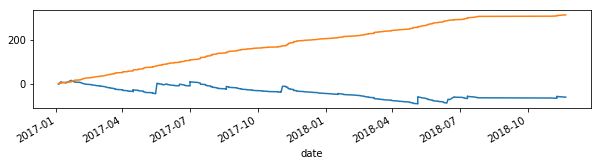

                            avg  bet  bets  profit
idx_1      idx_2                                  
A_RECLAMER pred_lasso_1_1 -0.43  140   140   -60.2


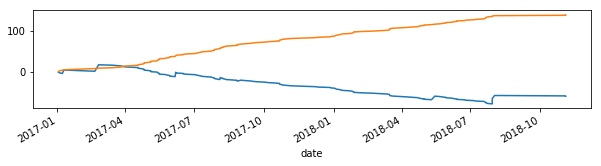

                                avg  bet  bets  profit
idx_1           idx_2                                 
HANDICAP_DIVISE pred_lasso_1_1  1.5   71    71   106.5


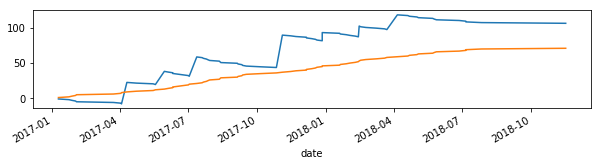

                                               avg  bet  bets  profit
idx_1                     idx_2                                      
HANDICAP_CATEGORIE_DIVISE pred_lasso_1_1  0.273077   52    52    14.2


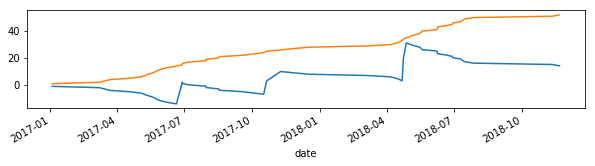

                                           avg  bet  bets  profit
idx_1                 idx_2                                      
HANDICAP_DE_CATEGORIE pred_lasso_1_1  0.988372   43    43    42.5


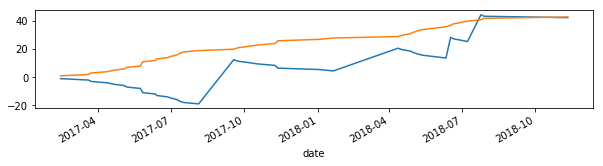

                             avg  bet  bets  profit
idx_1   idx_2                                      
INCONNU pred_lasso_1_1  0.330769   13    13     4.3


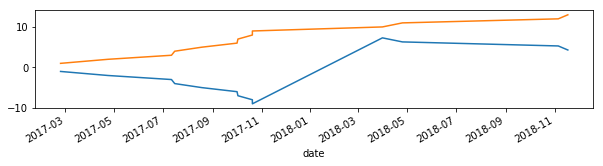

                              avg  bet  bets  profit
idx_1    idx_2                                      
GROUPE_I pred_lasso_1_1  1.033333    6     6     6.2


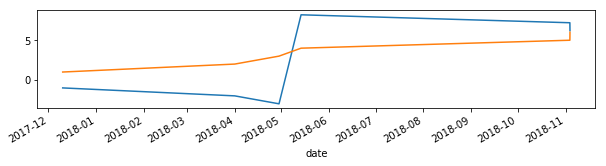

                                              avg  bet  bets  profit
idx_1                        idx_2                                  
COURSE_A_CONDITION_QUALIF_HP pred_lasso_1_1  1.74    5     5     8.7


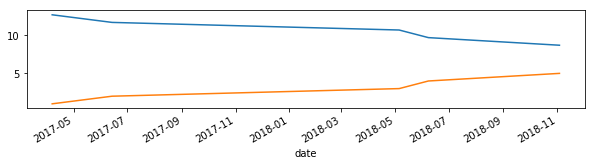

                          avg  bet  bets  profit
idx_1     idx_2                                 
GROUPE_II pred_lasso_1_1 -1.0    3     3    -3.0


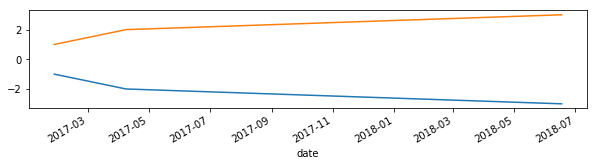

                           avg  bet  bets  profit
idx_1      idx_2                                 
GROUPE_III pred_lasso_1_1 -1.0    1     1    -1.0


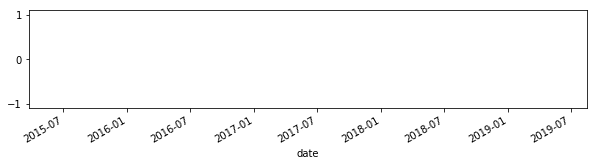

                                    avg  bet  bets  profit
idx_1               idx_2                                 
QUALIFICATION_ACCAF pred_lasso_1_1 -1.0    1     1    -1.0


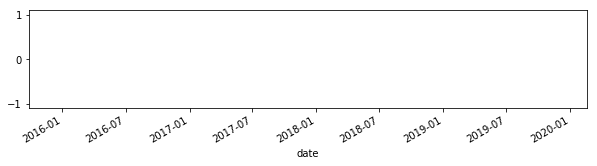

In [51]:
bb = bets[ (bets['sub_category']!='COURSE_A_CONDITIONS') & (bets['nb']==0) & (bets['target']=='pred_lasso_1_1') & (bets['odds_ref']>10) & (bets['odds_ref']<20) & (bets['pred']>20)].copy()
#bb = bb.groupby('id').filter(lambda r: r['num'].nunique() == 1)

graph_bb( bb, 'sub_category')

#graph_bb(bb, 'category')

In [ ]:
bb[ (bb['sub_category'] == 'HANDICAP') & (bb['target'] == 'pred_minus_ref_rf_10') & (bb['profit']<0)]['pred'].mean()

In [ ]:
bb.columns

In [ ]:
df['declared_player_count'].value_counts()